# 0. Download the LMFIT packege

In [17]:
!pip install lmfit

Defaulting to user installation because normal site-packages is not writeable


# 1. One parameter fitting:

## 1.1 Use hill-clambing method to solve by brute force

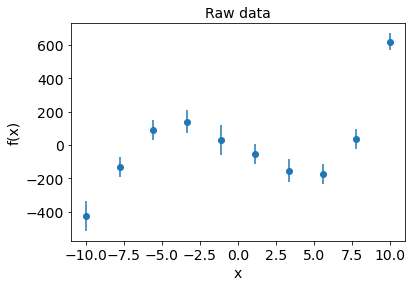

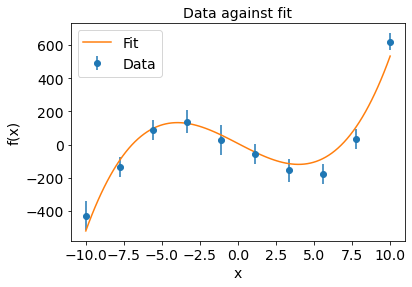

We find C = -47.40 +/- 3.04 with a reduced chi square of 0.98.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Function definitions
def function(x_variable, coefficient_variable):
    """
    Returns x^3 + coefficient * x + 7

    x_variable (float)
    coefficient_variable (float)
    """
    return x_variable**3 + coefficient_variable * x_variable + 7


def chi_squared(coefficient_variable, x_values, function_data, uncertainties):
    """ Returns chi squared after comparing function and data for a given
    coefficient

     coefficient_variable (float)
     x_values array of floats
     function_data array of floats
     errors array of floats
     """
    prediction = function(x_values, coefficient_variable)
    return np.sum(((prediction - function_data) / uncertainties)**2)


if __name__=="__main__":
    # Get data ----------------------------------------------------------------------------------------------------------
    filename = 'polynomial_data_1.txt'
    loaded_data = np.loadtxt(filename, delimiter='\t', skiprows=1)
    X_DATA = np.array(loaded_data[:,0])
    FUNCTION_DATA = np.array(loaded_data[:,1])
    UNCERTAINTY_DATA = np.array(loaded_data[:,2])

    # Plot raw data -----------------------------------------------------------------------------------------------------
    plt.figure(0)  # Will be plotting multiple figures. Important to help Python
    #               know here they start and where they end with .figure()
    #                and .show()
    plt.title('Raw data', fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.errorbar(X_DATA, FUNCTION_DATA, yerr=UNCERTAINTY_DATA, fmt='o')
    plt.show()

    # Find best value for coefficient by trying everything --------------------------------------------------------------
    # Using Brute Force so testing all values.
    # Hard to decide on range to search across using this approach.
    COEFFICIENT_VALUES = np.linspace(-54, -41, 100000)

    CHI_SQUARES = np.array([])

    for coefficient in COEFFICIENT_VALUES:

        CHI_SQUARES = np.append(CHI_SQUARES,
                                chi_squared(coefficient, X_DATA, FUNCTION_DATA,
                                            UNCERTAINTY_DATA))

    # Select best value
    FITTED_COEFFICIENT = COEFFICIENT_VALUES[np.argmin(CHI_SQUARES)]
    MINIMUM_CHI_SQUARED = np.min(CHI_SQUARES)

    SIGMA_INDEX = np.argmin(np.abs(CHI_SQUARES - MINIMUM_CHI_SQUARED - 1))

    SIGMA = np.abs(COEFFICIENT_VALUES[SIGMA_INDEX] - FITTED_COEFFICIENT)


    # Visually compare result with data ---------------------------------------------------------------------------------
    plt.figure()
    plt.title('Data against fit', fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    X_VALUES = np.linspace(-10, 10, 100)

    plt.errorbar(X_DATA, FUNCTION_DATA, yerr=UNCERTAINTY_DATA, fmt='o',
                 label='Data')
    plt.plot(X_VALUES, function(X_VALUES, FITTED_COEFFICIENT), label='Fit')
    plt.legend(fontsize=14)
    plt.show()


    print('We find C = {0:4.2f} +/- {1:4.2f} with a reduced chi square of'
          ' {2:3.2f}.'.format(FITTED_COEFFICIENT, SIGMA,
                              MINIMUM_CHI_SQUARED / (len(X_DATA) - 1)))

## 1.2 Use minimize() function in the LMFIT packege

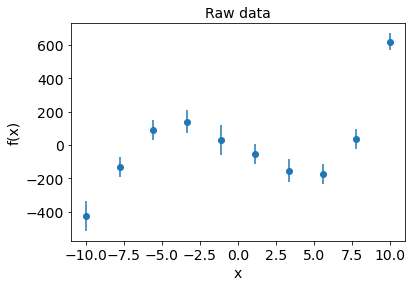

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 10
    # variables        = 1
    chi-square         = 8.80209961
    reduced chi-square = 0.97801107
    Akaike info crit   = 0.72405192
    Bayesian info crit = 1.02663701
[[Variables]]
    coefficient: -47.4024528 +/- 3.00744370 (6.34%) (init = 0)


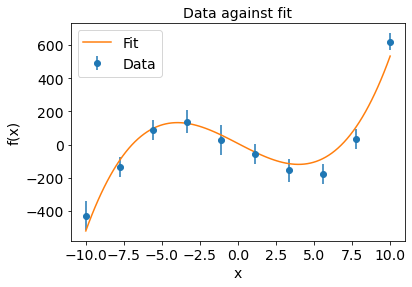

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, fit_report


params = Parameters()
params.add("coefficient", value = 0.)

# Function definitions
def get_residual(params, x_values, function_data, uncertainties):
    coefficient = params["coefficient"].value
    # prediction = x_values**3 + coefficient * x_values + 7
    prediction = function(x_values, coefficient)
    return (function_data - prediction)/uncertainties


def function(x_variable, coefficient_variable):
    """
    Returns x^3 + coefficient * x + 7

    x_variable (float)
    coefficient_variable (float)
    """
    return x_variable**3 + coefficient_variable * x_variable + 7


if __name__=="__main__":
    # Get data ------------------------------------------------------------------------------------------------------
    filename = 'polynomial_data_1.txt'
    loaded_data = np.loadtxt(filename, delimiter='\t', skiprows=1)
    X_DATA = np.array(loaded_data[:,0])
    FUNCTION_DATA = np.array(loaded_data[:,1])
    UNCERTAINTY_DATA = np.array(loaded_data[:,2])

    # Plot raw data -----------------------------------------------------------------------------------------------------
    plt.figure(0)  # Will be plotting multiple figures. Important to help Python
    #               know here they start and where they end with .figure()
    #                and .show()
    plt.title('Raw data', fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.errorbar(X_DATA, FUNCTION_DATA, yerr=UNCERTAINTY_DATA, fmt='o')
    plt.show()

    # Using LMFIT package to find best value for coefficient by trying everything ---------------------------------------
    out = minimize(get_residual, params, args=(X_DATA, FUNCTION_DATA, UNCERTAINTY_DATA))
    print(fit_report(out))
    FITTED_COEFFICIENT = out.params


    # Visually compare result with data ---------------------------------------------------------------------------------
    plt.figure()
    plt.title('Data against fit', fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    X_VALUES = np.linspace(-10, 10, 100)

    plt.errorbar(X_DATA, FUNCTION_DATA, yerr=UNCERTAINTY_DATA, fmt='o',
                 label='Data')
    plt.plot(X_VALUES, function(X_VALUES, FITTED_COEFFICIENT), label='Fit')
    plt.legend(fontsize=14)
    plt.show()

# 2. Two parameter fitting:

## 2.1 Use hill-clambing method to solve by brute force

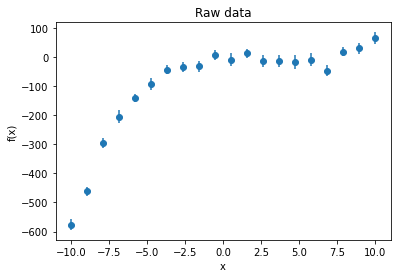

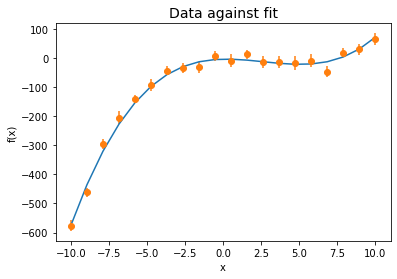

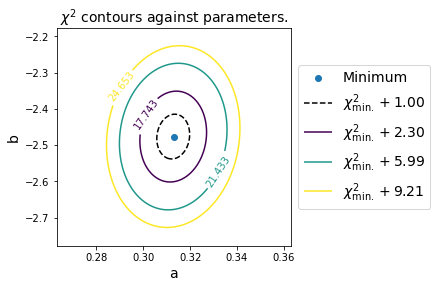

We find a = 0.313 +/- 0.007, b = -2.478 +/- 0.062, with a reduced chi square of 0.86.


In [19]:
# -*- coding: utf-8 -*-
"""
uncertainty_on_2_parameters_brute_force.py

Reads in data, fits two parameters, a & b, for the polynomial:
    f(x) = ax^3+bx^2+x-4.5

Does the fit by brute force, i.e. using a 2D hill-climbing approach with varying step size.
Exits code if fit is unsuccesful, IPython prints messy warning as a result.

Contour plots the chi^2 to illustrate location of uncertainties and dependence

Tangdi Luan 31/OCT/2023

"""

import sys
import numpy as np
import matplotlib.pyplot as plt

STEP_START = 1
TOLERANCE = 0.001

# If the routine is unable to find a better value after MAX_FAILED_ATTEMPTS
# number of continuous reductions to the step size then exit the routine.
MAX_FAILED_ATTEMPTS = 5


def function(x_variable, a_coefficient, b_coefficient):
    """
    Returns
    ax^3+bx^2+x-4.5
    x_variable (float)
    a_coefficient (float)
    b_coefficient (float)
    """
    return (a_coefficient * x_variable**3
            + b_coefficient * x_variable**2 + x_variable - 4.5)


def mesh_arrays(x_array, y_array):
    """Returns two meshed arrays of size len(x_array)
    by len(y_array)
    x_array array[floats]
    y_array array[floats]
    """
    x_array_mesh = np.empty((0, len(x_array)))

    for dummy in range(len(y_array)):
        x_array_mesh = np.vstack((x_array_mesh, x_array))

    y_array_mesh = np.empty((0, len(y_array)))

    for dummy in range(len(x_array)):
        y_array_mesh = np.vstack((y_array_mesh, y_array))

    y_array_mesh = np.transpose(y_array_mesh)

    return x_array_mesh, y_array_mesh


def chi_squared(a_parameter, b_parameter, data):
    """Returns chi squared for a pre defined function depenedent on one
    variable, x, with two parameters, a & b.
    data is a 2D array composed of rows of [x values, f(x) values and
    uncertainties]

    data array([float, float, float])
    a_parameter (float)
    b_parameter (float)
    """
    chi_square = 0
    for entry in data:
        chi_square += (((function(entry[0], a_parameter, b_parameter)
                         - entry[1]) / entry[2])**2)

    return chi_square


def hill_climbing(data, step=STEP_START):
    """
    Runs Hill Climbing algorithm in 2D with a varying step size.
    Args:
        data array([float, float, float])
        step kwarg (float)
    Returns:
        np.array([minimum_chi_squared (float),
                  [a_fit, b_fit] ([float, float]),
                  counter (int),
                  success (bool)])
    """
    # Guess starting values
    a_fit = 0.
    b_fit = 0.
    minimum_chi_squared = chi_squared(a_fit, b_fit, data)
    difference = 1
    counter = 0

    # Count how many times we fail to find a better value after drecreasing the
    # step size. If it matches MAX_FAILED_ATTEMPTS, then exit loop and
    # set success = 0.
    timeout = 0
    success = 1

    # Look around current best fit to find better value

    while difference > TOLERANCE:
        counter += 1

        # Save current best values for comparison later
        a_test = a_fit
        b_test = b_fit

        for i in np.arange(-1, 2, 1):
            for j in np.arange(-1, 2, 1):

                test_chi_squared = chi_squared(a_fit + i * step, b_fit
                                               + j * step, data)

                if test_chi_squared < minimum_chi_squared:

                    timeout = 0

                    # If better solution found update parameters:

                    difference = np.abs(minimum_chi_squared - test_chi_squared)
                    minimum_chi_squared = test_chi_squared

                    a_fit += i * step
                    b_fit += j * step

        if a_fit == a_test and b_fit == b_test:
            # If we have failed to find better values then reduce the step size
            step = step * 0.1
            timeout += 1
            if timeout == MAX_FAILED_ATTEMPTS:
                success = 0
                print('Failed to reach desired accuracy with a step size of'
                      ' {:g}'.format(step))
                break
    return [minimum_chi_squared, [a_fit, b_fit], counter, success]


if __name__=="__main__":
    # Get data --------------------------------------------------------------------------------------------------
    filename = 'polynomial_data_2.txt'
    DATA = np.loadtxt(filename, delimiter='\t', skiprows=1)


    # Plot raw data ---------------------------------------------------------------------------------------------
    RAW_DATA_FIGURE = plt.figure()
    RAW_DATA_PLOT = RAW_DATA_FIGURE.add_subplot(111)

    RAW_DATA_PLOT.set_title('Raw data')
    RAW_DATA_PLOT.set_xlabel('x')
    RAW_DATA_PLOT.set_ylabel('f(x)')


    RAW_DATA_PLOT.errorbar(DATA[:, 0], DATA[:, 1], yerr=DATA[:, 2], fmt='o')
    plt.show()

    # Find values for a and b using 2D Hill-Climbing ------------------------------------------------------------
    FIT = hill_climbing(DATA)

    if FIT[-1] == 0:
        print('Terminating code.')
        sys.exit()

    MINIMUM_CHI_SQUARED = FIT[0]
    FITTED_PARAMETERS = FIT[1]

    FITTED_DATA_FIGURE = plt.figure()
    FITTED_DATA_PLOT = FITTED_DATA_FIGURE.add_subplot(111)

    FITTED_DATA_PLOT.set_title('Data against fit', fontsize=14)
    FITTED_DATA_PLOT.set_xlabel('x')
    FITTED_DATA_PLOT.set_ylabel('f(x)')

    FITTED_DATA_PLOT.plot(DATA[:, 0], function(DATA[:, 0], FITTED_PARAMETERS[0],
                                               FITTED_PARAMETERS[1]))
    FITTED_DATA_PLOT.errorbar(DATA[:, 0], DATA[:, 1], yerr=DATA[:, 2], fmt='o')
    plt.show()

    # Contour plot of parameters
    # Note: these are hardcoded, not best practice.
    A_VALUES = np.linspace(FITTED_PARAMETERS[0] - 0.05,
                           FITTED_PARAMETERS[0] + 0.05, 500)
    B_VALUES = np.linspace(FITTED_PARAMETERS[1] - 0.3,
                           FITTED_PARAMETERS[1] + 0.3, 500)

    A_MESH, B_MESH = mesh_arrays(A_VALUES, B_VALUES)

    PARAMETERS_CONTOUR_FIGURE = plt.figure()

    PARAMETERS_CONTOUR_PLOT = PARAMETERS_CONTOUR_FIGURE.add_subplot(111)

    PARAMETERS_CONTOUR_PLOT.set_title(r'$\chi^2$ contours against parameters.',
                                      fontsize=14)
    PARAMETERS_CONTOUR_PLOT.set_xlabel('a', fontsize=14)
    PARAMETERS_CONTOUR_PLOT.set_ylabel('b', fontsize=14)


    # Place minimum as single point
    PARAMETERS_CONTOUR_PLOT.scatter(FITTED_PARAMETERS[0], FITTED_PARAMETERS[1],
                                    label='Minimum')


    # chi^2 min + 1 contour, treated separately as we want it dashed.
    chi_sqr_plus_one_contour = PARAMETERS_CONTOUR_PLOT.contour(A_MESH, B_MESH,
                                    chi_squared(A_MESH, B_MESH, DATA),
                                    levels=[int(MINIMUM_CHI_SQUARED + 1.00)],
                                    linestyles='dashed',
                                    colors='k')

    # find the 4 points of contact on the chi_squared + 1 curve
    dots_data = chi_sqr_plus_one_contour.allsegs[0][0]
    dot_with_max_x_value = np.max(dots_data[:,0])
    dot_with_min_x_value = np.min(dots_data[:,0])
    dot_with_max_y_value = np.max(dots_data[:,1])
    dot_with_min_y_value = np.min(dots_data[:,1])

    # Calculate the errors of parameters a and b
    SIGMA_A = (dot_with_max_x_value - dot_with_min_x_value)/2
    SIGMA_B = (dot_with_max_y_value - dot_with_min_y_value)/2

    # Contours to be plotted
    # Ideally these numbers would be defined elsewhere so they are easy to ammend
    # without having to ammend several things.
    CHI_SQUARED_LEVELS = [MINIMUM_CHI_SQUARED + 2.30, MINIMUM_CHI_SQUARED + 5.99,
                          MINIMUM_CHI_SQUARED + 9.21]

    CONTOUR_PLOT = PARAMETERS_CONTOUR_PLOT.contour(A_MESH, B_MESH,
                                                   chi_squared(A_MESH,
                                                               B_MESH, DATA),
                                                   levels=CHI_SQUARED_LEVELS)
    LABELS = ['Minimum', r'$\chi^2_{{\mathrm{{min.}}}}+1.00$',
              r'$\chi^2_{{\mathrm{{min.}}}}+2.30$',
              r'$\chi^2_{{\mathrm{{min.}}}}+5.99$',
              r'$\chi^2_{{\mathrm{{min.}}}}+9.21$']

    PARAMETERS_CONTOUR_PLOT.clabel(CONTOUR_PLOT)

    # Want plot legend outside of plot area, need to adjust size of plot so that
    # it is visible
    BOX = PARAMETERS_CONTOUR_PLOT.get_position()
    PARAMETERS_CONTOUR_PLOT.set_position([BOX.x0, BOX.y0, BOX.width * 0.7,
                                          BOX.height])

    # Add custom plot labels
    for index, label in enumerate(LABELS):
        PARAMETERS_CONTOUR_PLOT.collections[index].set_label(label)
        PARAMETERS_CONTOUR_PLOT.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                                   fontsize=14)

    plt.show()

    print('We find a = {0:3.3f} +/- {1:3.3f}, b = {2:3.3f} +/- {3:3.3f}, with a reduced chi square of'
          ' {4:3.2f}.'.format(FITTED_PARAMETERS[0], SIGMA_A, FITTED_PARAMETERS[1], SIGMA_B,
                              MINIMUM_CHI_SQUARED / (len(DATA) - 2)))


## 2.2 Use minimize() function in the LMFIT packege

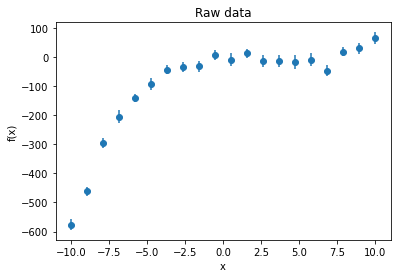

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 15.4419108
    reduced chi-square = 0.85788394
    Akaike info crit   = -1.17293954
    Bayesian info crit = 0.81852501
[[Variables]]
    a_coefficient:  0.31277316 +/- 0.00868625 (2.78%) (init = 0)
    b_coefficient: -2.47659372 +/- 0.07651385 (3.09%) (init = 0)


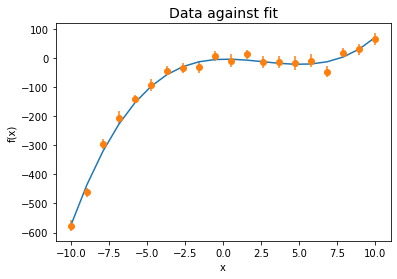

In [20]:
# -*- coding: utf-8 -*-
"""
uncertainty_on_2_parameters_lmfit_package.py

Reads in data, fits two parameters, a & b, for the polynomial:
    f(x) = ax^3+bx^2+x-4.5

Does the fit by using LMFIT package.
Exits code if fit is unsuccesful, IPython prints messy warning as a result.

Contour plots the chi^2 to illustrate location of uncertainties and dependence

Tangdi Luan 31/OCT/2023

"""

import sys
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, fit_report


params = Parameters()
params.add("a_coefficient", value = 0.)
params.add("b_coefficient", value = 0.)

# If the routine is unable to find a better value after MAX_FAILED_ATTEMPTS
# number of continuous reductions to the step size then exit the routine.
MAX_FAILED_ATTEMPTS = 5


def get_residual(params, x_values, function_data, uncertainties):
    a_coefficient = params["a_coefficient"].value
    b_coefficient = params["b_coefficient"].value
    # prediction = x_values**3 + coefficient * x_values + 7
    prediction = function(x_values, a_coefficient, b_coefficient)
    return (function_data - prediction)/uncertainties


def function(x_variable, a_coefficient, b_coefficient):
    """
    Returns
    ax^3+bx^2+x-4.5
    x_variable (float)
    a_coefficient (float)
    b_coefficient (float)
    """
    return (a_coefficient * x_variable**3
            + b_coefficient * x_variable**2 + x_variable - 4.5)


if __name__=="__main__":
    # Get data ----------------------------------------------------------------------------------------------------------
    filename = 'polynomial_data_2.txt'
    DATA = np.loadtxt(filename, delimiter='\t', skiprows=1)
    # DATA = np.genfromtxt('polynomial_data.csv', delimiter=',')
    DATA = np.transpose(DATA)

    # Plot raw data -----------------------------------------------------------------------------------------------------
    RAW_DATA_FIGURE = plt.figure()
    RAW_DATA_PLOT = RAW_DATA_FIGURE.add_subplot(111)

    RAW_DATA_PLOT.set_title('Raw data')
    RAW_DATA_PLOT.set_xlabel('x')
    RAW_DATA_PLOT.set_ylabel('f(x)')


    RAW_DATA_PLOT.errorbar(DATA[0], DATA[1], yerr=DATA[2], fmt='o')
    plt.show()


    # Using LMFIT package to find best value for coefficient by trying everything ---------------------------------------
    out = minimize(get_residual, params, args=(DATA[0], DATA[1], DATA[2]))
    print(fit_report(out))
    FITTED_PARAMETERS = [out.params["a_coefficient"].value, out.params["b_coefficient"].value]


    # Visually compare result with data ---------------------------------------------------------------------------------

    FITTED_DATA_FIGURE = plt.figure()
    FITTED_DATA_PLOT = FITTED_DATA_FIGURE.add_subplot(111)

    FITTED_DATA_PLOT.set_title('Data against fit', fontsize=14)
    FITTED_DATA_PLOT.set_xlabel('x')
    FITTED_DATA_PLOT.set_ylabel('f(x)')

    FITTED_DATA_PLOT.plot(DATA[0], function(DATA[0], FITTED_PARAMETERS[0],
                                               FITTED_PARAMETERS[1]))
    FITTED_DATA_PLOT.errorbar(DATA[0], DATA[1], yerr=DATA[2], fmt='o')
    plt.show()